# LDA Song Recommendation

Latent Dirichlet Allocation (LDA)

Start with 47166 documents that contain many unique words (or features). The goal is to reduce those words down into some number of topics, so that each document can be represented as some combination of the topics.

In [45]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.metrics import pairwise_distances

# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline

In [2]:
from sklearn.feature_extraction import text
 
stopwords = text.ENGLISH_STOP_WORDS
stopwords = list(stopwords)

In [3]:
stopwords.extend(['eh', 'uh', 'lo', 'dyn', 'urlcopyembedcopy', 've', 'ain', 'got', 'gon', 'em', 
                  'don', 'que', 'en', 'vie', 'el', 'di', 'll', 'won', 'ya', 'mi', 'est', 'ni',
                  'didn', 'cause', 'just', 'tu'
                 ])

In [4]:
# read in dataframe
final_filtered_df = pd.read_pickle('final_filtered_df.pkl')

In [57]:
vectorizer = CountVectorizer(stop_words = stopwords)
doc_word = vectorizer.fit_transform(final_filtered_df['Lyrics'])
doc_word.shape

(47166, 113894)

In [58]:
lda_model = LDA(n_components=10, n_jobs=-1)
doc_topic = lda_model.fit_transform(doc_word)
doc_topic.shape

(47166, 10)

The W matrix shows us the 20 resulting topics, and the terms that are associated with each topic. In this case:

- Topic 1 seems to be about Christian rock (country)
- Topic 2 seems to be about don't think feel know
- Topic 3 seems to be about people movement
- Topic 4 seems to be about death destruction - dark
- Topic 5 seems to be about love want baby - light
- Topic 6 seems to be about explicit money
- Topic 7 seems to be about vocalese/happy do-wap
- Topic 8 seems to be about youth and slang
- Topic 9 seems to be about deep feelings, loss
- Topic 10 seems to be about dance & music, positive

In [59]:
topic_word = lda_model.components_
topic_word.shape

(10, 113894)

In [60]:
words = vectorizer.get_feature_names()
t = lda_model.components_.argsort(axis=1)[:,-1:-11:-1]
topic_words = [[words[e] for e in l] for l in t]
print(tabulate(topic_words))

-----  ----  -----  ---------  -------  ------  -----  ------  -----  ----
gonna  god   rock   everybody  alright  lord    like   round   big    nah
know   like  im     say        think    dont    tell   time    want   feel
yeah   know  run    like       huh      wake    man    people  say    ride
na     life  let    die        world    blood   time   dead    live   burn
oh     baby  know   wanna      want     let     love   like    girl   come
like   fuck  shit   bitch      nigga    niggas  man    know    money  make
ooh    da    boom   doo        ha       happy   ma     dum     ba     na
ah     come  away   dem        man      young   gimme  hello   ba     yuh
know   feel  way    like       time     away    love   heart   day    eyes
love   la    dance  music      like     higher  bye    heart   high   baby
-----  ----  -----  ---------  -------  ------  -----  ------  -----  ----


The H matrix shows us the documents we started with, and how each document is made up of the 2 resulting topics. In this case:

The first document seems to be about music
The last document seems to be about sports
Everything in between is a combination of the two

In [61]:
ex_label = [final_filtered_df['Artist'] + " - " + final_filtered_df['Title']]
doc_topic_lda = pd.DataFrame(doc_topic.round(5),
                             index = ex_label,
                             columns = ["1","2", "3", "4", "5", "6", "7", "8", "9", "10"])
                                        #"11", "12", "13", "14", "15"])#, "16", "17", "18", "19", "20"])
doc_topic_lda.sample(10)

1        2        3        4  \
Emma G - Faith in You                   0.00035  0.28968  0.00035  0.37003   
Travis Scott - Pornography              0.02623  0.00039  0.00039  0.22808   
King Krule - Dum Surfer                 0.00074  0.42043  0.00074  0.13096   
Kwabs - Cheating on Me                  0.00156  0.35062  0.00156  0.00156   
Eloi El - Everlasting Love              0.10914  0.00022  0.00022  0.69741   
DMX - Party Up (Up In Here)             0.00031  0.07454  0.00031  0.00031   
Hopex - Warrior                         0.18152  0.07065  0.02193  0.33415   
after noon - Loose Leaf                 0.07053  0.00028  0.00028  0.00028   
Hatebreed - As Damaged as Me            0.00115  0.89864  0.00115  0.06775   
The Maranatha! Singers - Seek Ye First  0.00213  0.00213  0.00213  0.58727   

                                              5        6        7        8  \
Emma G - Faith in You                   0.04839  0.25112  0.00035  0.03905   
Travis Scott - Pornography              0.08255  0.52166  0.00039  0.00039   
King Krule - Dum Surfer                 0.00074  0.35388  0.00074  0.00074   
Kwabs - Cheating on Me                  0.00156  0.00156  0.00156  0.00156   
Eloi El - Everlasting Love              0.00022  0.00022  0.00846  0.03932   
DMX - Party Up (Up In Here)             0.00031  0.79292  0.00031  0.00031   
Hopex - Warrior                         0.00074  0.38806  0.00074  0.00074   
after noon - Loose Leaf                 0.00028  0.89805  0.02949  0.00028   
Hatebreed - As Damaged as Me            0.00115  0.02557  0.00115  0.00115   
The Maranatha! Singers - Seek Ye First  0.00213  0.00213  0.00213  0.11185   

                                              9       10  
Emma G - Faith in You                   0.00035  0.00035  
Travis Scott - Pornography              0.10378  0.03613  
King Krule - Dum Surfer                 0.00074  0.09029  
Kwabs - Cheating on Me                  0.63688  0.00156  
Eloi El - Everlasting Love              0.14459  0.00022  
DMX - Party Up (Up In Here)             0.13036  0.00031  
Hopex - Warrior                         0.00074  0.00074  
after noon - Loose Leaf                 0.00028  0.00028  
Hatebreed - As Damaged as Me            0.00115  0.00115  
The Maranatha! Singers - Seek Ye First  0.28599  0.00213

In [62]:
pairwise_distances(doc_topic[0].reshape(1,-1), doc_topic, metric='cosine').argsort()

array([[    0, 46747, 40708, ..., 16835, 41795, 31131]])

#### Now take a song lyric and recommend another similar song

In [63]:
def song_reco(lyric_in, num_picks, doc_topic, df):
    
    vt = vectorizer.transform(lyric_in)
    tt = lda_model.transform(vt)
    dist = pairwise_distances(tt, doc_topic, metric='cosine').argsort()
    songs_out = []
    
    for i in range(4):
        pick = df.iloc[dist[0][i], :]
        songs_out.append([pick['Artist'][:13], pick['Title'][:13], pick['Emotion'], pick['Lyrics'][:95]])
        
        if i == 0:
            print(f"Your song is probably:\n\t{pick['Title']} by {pick['Artist']}")
            print(f"Mood:\n\t{pick['Emotion']}\nLyrics:\n\t{pick['Lyrics'][:300]}\n")
        else:
            print(f"Recommendation {i}:\n\t{pick['Title']} by {pick['Artist']}")
            print(f"Mood:\n\t{pick['Emotion']}\nLyrics:\n\t{pick['Lyrics'][:300]}\n")
    
    return songs_out

In [64]:
t2 = "First things first I'ma say all the words inside my head I'm fired up and tired of the way that things \
      have been, oh-ooh The way that things have been, oh-ooh Second thing second Don't you tell me what you \
      think that I could be I'm the one at the sail, I'm the master of my sea, oh-ooh The master of my sea, \
      oh-ooh I was broken from a young age Taking my sulking to the masses Writing my poems for the few That \
      look at me, took to me, shook to me, feeling me Singing from heartache from the pain Taking my message \
      from the veins Speaking my lesson from the brain Seeing the beauty through the... Pain! You made me a, \
      you made me a believer, believer Pain! You break me down and build me up, believer, believer Pain! Oh, \
      let the bullets fly, oh, let them rain My life, my love, my drive, it came from... Pain! You made me a, \
      you made me a believer, believer First things first Can you imagine what's about to happen? It's Weezy \
      the Dragon, I link with the Dragons And we gon' get ratchet, no need for imaginin' This is what's happenin' \
      Second thing second, I reckon immaculate Sound about accurate I know that strength, it don't come, don't \
      come without strategy I know the sweet, it don't come without cavities I know the passages come with some \
      traffic I start with from the basement, end up in the attic And third thing third Whoever call me out, they \
      simply can't count Let's get mathematic, I'm up in this, huh Is you a believer? I get a unicorn out of a \
      zebra I wear my uniform like a tuxedo This dragon don't hold his breath, don't need no breather Love you \
      Ms. Cita, the son of a leader I know the bloomin' don't come without rain I know the losin' don't come \
      without shame I know the beauty don't come without hurt Hol' up, hol' up, last thing last I know that \
      Tunechi don't come without Wayne I know that losin' don't come without game I know that glory don't come \
      without... Don't come without... Pain! You made me a, you made me a believer, believer Pain! You break me \
      down and build me up, believer, believer Pain Oh, let the bullets fly, oh, let them rain My life, my love, \
      my drive, it came from... Pain! You made me a, you made me a believer, believer Last things last By the \
      grace of fire and flames You're the face of the future, the blood in my veins, oh-ooh The blood in my \
      veins, oh-ooh But they never did, ever lived, ebbing and flowing Inhibited, limited 'til it broke open \
      and rained down It rained down, like... Pain! You made me a, you made me a believer, believer Pain! You \
      break me down and build me up, believer, believer Pain Oh, let the bullets fly, oh, let them rain My life, \
      my love, my drive, it came from... Pain! You made me a, you made me a believer, believer"

In [65]:
t3 = "We're no strangers to love You know the rules and so do I A full commitment's what I'm thinking of You \
       wouldn't get this from any other guy I just wanna tell you how I'm feeling Gotta make you understand Never \
       gonna give you up Never gonna let you down Never gonna run around and desert you Never gonna make you cry \
       Never gonna say goodbye Never gonna tell a lie and hurt you We've known each other for so long Your heart's \
       been aching, but you're too shy to say it Inside, we both know what's been going on We know the game, and \
       we're gonna play it And if you ask me how I'm feeling Don't tell me you're too blind to see Never gonna \
       give you up Never gonna let you down Never gonna run around and desert you Never gonna make you cry Never \
       gonna say goodbye Never gonna tell a lie and hurt you Never gonna give you up Never gonna let you down \
       Never gonna run around and desert you Never gonna make you cry Never gonna say goodbye Never gonna tell a \
       lie and hurt you Ooh  Ooh-ooh Ooh-ooh Never gonna give, never gonna give  Ooh-ooh Never gonna give, never \
       gonna give We've known each other for so long Your heart's been aching, but you're too shy to say it \
       Inside, we both know what's been going on We know the game, and we're gonna play it I just wanna tell you \
       how I'm feeling Gotta make you understand Never gonna give you up Never gonna let you down Never gonna \
       run around and desert you Never gonna make you cry Never gonna say goodbye Never gonna tell a lie and \
       hurt you Never gonna give you up Never gonna let you down Never gonna run around and desert you Never \
       gonna make you cry Never gonna say goodbye Never gonna tell a lie and hurt you Never gonna give you up \
       Never gonna let you down Never gonna run around and desert you Never gonna make you cry Never gonna say \
       goodbye Never gonna tell a lie and hurt you"

In [66]:
data = ([['Rick Astley', 'Never Gonna Give You Up', t3],
         ['Imagine Dragons', 'Believer', t2],
         ['Toad The Wet Sprocket', 'Walk On The Ocean', final_filtered_df.iloc[42122,:]['Lyrics']],
         ['The Rolling Stones', "Jumpin' Jack Flash", final_filtered_df.iloc[41103, :]['Lyrics']],
         ['Ramones', 'I Wanna Be Sedated', final_filtered_df.iloc[32799, :]['Lyrics']],
         ['Frank Sinatra', 'Theme From New York, New York', final_filtered_df.iloc[14612, :]['Lyrics']],
         ['Justin Timberlake', "CAN'T STOP THE FEELING!", final_filtered_df.iloc[20726, :]['Lyrics']]
        ])
songs_in = pd.DataFrame(data, columns=['Artist', 'Title', 'Lyrics'])
songs_in

Artist                          Title  \
0            Rick Astley        Never Gonna Give You Up   
1        Imagine Dragons                       Believer   
2  Toad The Wet Sprocket              Walk On The Ocean   
3     The Rolling Stones             Jumpin' Jack Flash   
4                Ramones             I Wanna Be Sedated   
5          Frank Sinatra  Theme From New York, New York   
6      Justin Timberlake        CAN'T STOP THE FEELING!   

                                              Lyrics  
0  We're no strangers to love You know the rules ...  
1  First things first I'ma say all the words insi...  
2   We spotted the ocean at the head of the trail...  
3     One two!   I was born in a crossfire hurric...  
4   Twenty-twenty-twenty four hours to go I wanna...  
5   Start spreadin' the news I'm leavin' today I ...  
6   I got this feeling inside my bones It goes el...

In [67]:
songs = []
for i, song in songs_in.iterrows():
    reco = song_reco(song[["Lyrics"]], 3, doc_topic, final_filtered_df)
    songs.extend(reco)

Your song is probably:
	Learned It From The Radio by Thomas Rhett
Mood:
	sad
Lyrics:
	 How to be proud of that town ain't nobody heard of Had a big dream, seventeen, some day how to grow up How to make dust fly out on a no name road Yeah, I learned it from the radio   How to wake up, how to work tough How to roll up those sleeves, how to throw down How to get loud, and what to put in

Recommendation 1:
	Rock On by Tucker Beathard
Mood:
	happy
Lyrics:
	 Girl I really did mean it when I wished you the best Good to hear you're killing it way out west Finding your own way didn't take too long Baby rock on, rock on   It's getting tough keeping up with where you are Posting pics like some big Hollywood star Guess every club in town is playing your song

Recommendation 2:
	Girl in a Cowboy Hat by Brett Kissel
Mood:
	happy
Lyrics:
	 I like a girl raised on a farm Dusty old boots and Daisy Duke charm In a beat up truck Im riding bareback I love a girl in a cowboy hat   She could be a supermodel

In [68]:
print(tabulate(songs, ['Artist', 'Title', 'Mood', 'Lyrics'], tablefmt="fancy_grid"))

╒═══════════════╤═══════════════╤════════╤═════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Artist        │ Title         │ Mood   │ Lyrics                                                                                          │
╞═══════════════╪═══════════════╪════════╪═════════════════════════════════════════════════════════════════════════════════════════════════╡
│ Thomas Rhett  │ Learned It Fr │ sad    │ How to be proud of that town ain't nobody heard of Had a big dream, seventeen, some day how to  │
├───────────────┼───────────────┼────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Tucker Beatha │ Rock On       │ happy  │ Girl I really did mean it when I wished you the best Good to hear you're killing it way out we  │
├───────────────┼───────────────┼────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Brett Kisse

# Create Word Clouds of Emotions/Moods

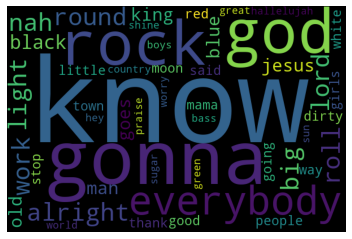

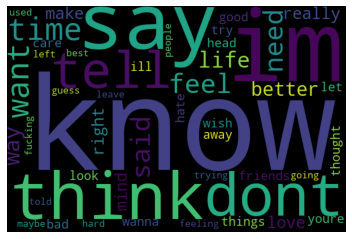

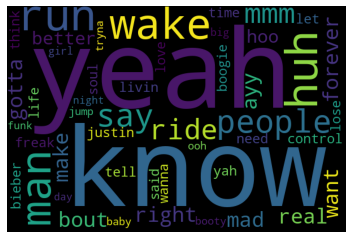

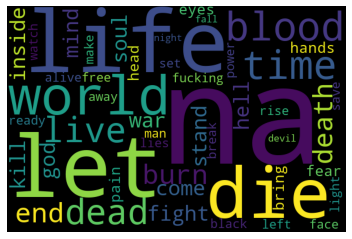

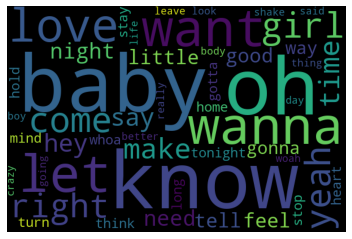

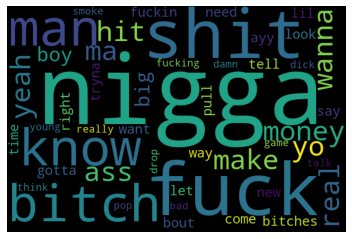

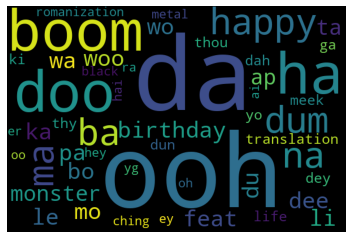

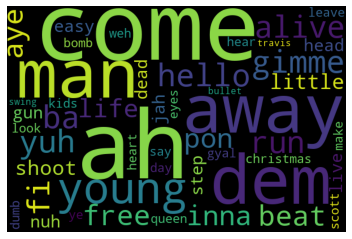

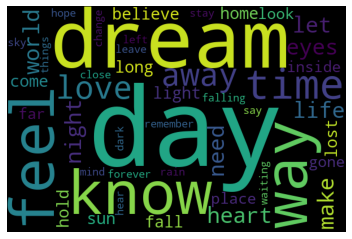

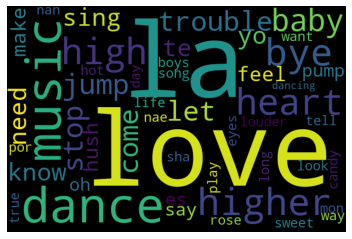

In [69]:
from wordcloud import WordCloud

vocab = vectorizer.get_feature_names()

# Generate a word cloud image for given topic
def draw_word_cloud(index):
    
    imp_words_topic = ""
    components = lda_model.components_[index]
    vocab_comp = zip(vocab, components)
    sorted_words = sorted(vocab_comp, key=lambda x:x[1], reverse=True)[:50]
    
    for word in sorted_words:
        imp_words_topic = imp_words_topic + " " + word[0]

    wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()
 
# draw all topics to compare
for i in range(10):
    draw_word_cloud(i)

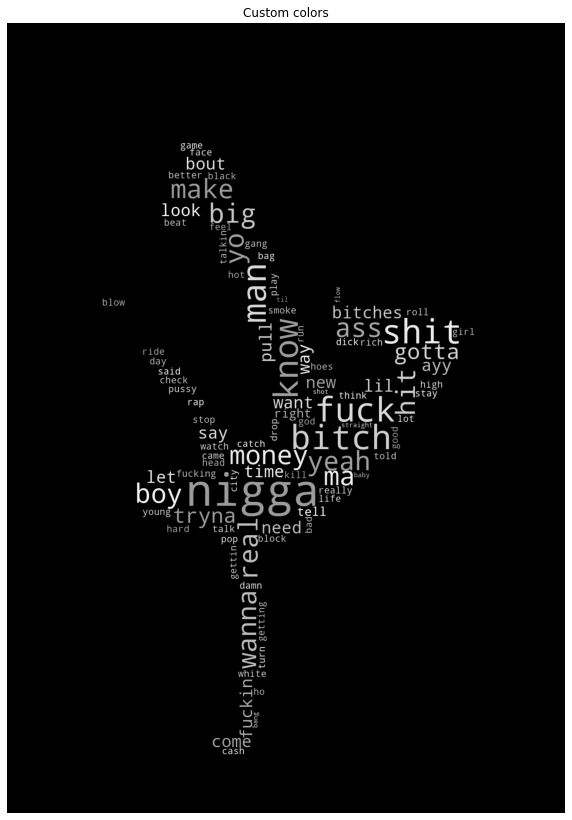

In [71]:


from wordcloud import WordCloud
from PIL import Image
from os import path
import os
import random

vocab = vectorizer.get_feature_names()
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask = np.array(Image.open(path.join(d, "hip_hop_dance_stencil.png")))

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# Generate a word cloud image for given topic
def draw_word_cloud(index):
    
    imp_words_topic = ""
    components = lda_model.components_[index]
    vocab_comp = zip(vocab, components)
    sorted_words = sorted(vocab_comp, key=lambda x:x[1], reverse=True)[:100]
    
    for word in sorted_words:
        imp_words_topic = imp_words_topic + " " + word[0]

    wc = WordCloud(mask=mask).generate(imp_words_topic)
    plt.figure(figsize=(10,16))
    default_colors = wc.to_array()
    plt.title("Custom colors")
    plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
               interpolation="bilinear")
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
 
# draw explicit topic over breakdancer image
draw_word_cloud(5)

# Visualize Using pyLDAvis

In [72]:
import pyLDAvis
import pyLDAvis.sklearn

In [73]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, doc_word, vectorizer, mds='tsne')
panel

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
5      32.420952   8.115230       1        1  24.911999
1       0.648955  71.707100       2        1  17.509281
8      71.019684   9.971006       3        1  16.123728
4       3.785981  33.185135       4        1  15.116924
3     -42.666500  -9.222070       5        1  12.454590
0      -3.621689 -43.526516       6        1   3.879246
2      -3.632402  -4.171708       7        1   2.908876
9     -36.584400  35.804413       8        1   2.606941
7      44.391380  50.615383       9        1   2.293002
6      40.235809 -31.591665      10        1   2.195413, topic_info=           Term          Freq         Total Category  logprob  loglift
58908      love  65795.000000  65795.000000  Default  30.0000  30.0000
112157     yeah  54722.000000  54722.000000  Default  29.0000  29.0000
71177        oh  67782.000000  67782.000000  Default  28.0000  28.0000
71757       ooh  16699.000000  16699.000000  Default  27.0000  27.0000
54614      know  86912.000000  86912.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
59499        ma   1095.582855   7337.157564  Topic10  -4.8245   1.9171
111004      woo    474.576329   1274.930752  Topic10  -5.6611   2.8306
98104        ta    316.070140    537.949636  Topic10  -6.0675   3.2870
66816        na    776.778829  12241.030661  Topic10  -5.1683   1.0614
65041   monster    328.236742   1004.839418  Topic10  -6.0298   2.7000

[877 rows x 6 columns], token_table=        Topic      Freq       Term
term                              
180         1  0.043921         ab
180        10  0.953092         ab
492         1  0.011299      abyss
492         2  0.016948      abyss
492         3  0.039545      abyss
...       ...       ...        ...
112991      1  0.433073        yuh
112991      9  0.565731        yuh
112992      2  0.965469  yuhaengga
113376      5  0.979106     zenith
113648      3  0.947233      zomba

[3587 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 9, 5, 4, 1, 3, 10, 8, 7])

# Use TextBlob to Calculate Sentiment Polarity

In [75]:
from textblob import TextBlob

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
final_filtered_df['polarity'] = final_filtered_df['Lyrics'].map(lambda text: TextBlob(text).sentiment.polarity)
final_filtered_df

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Artist                   Title    Year Emotion  \
0      "Weird Al" Yankovic      The Hamilton Polka  2018.0   angry   
1              #90s Update               Follow Me  2017.0   happy   
2                   #Karma                Be Happy  2020.0   happy   
3                   #Karma   Happy, Happy Birthday  2021.0   happy   
4                   $EMMY!                Only One  2020.0     sad   
...                    ...                     ...     ...     ...   
47161                 前島麻由                  YELLOW  2019.0   chill   
47162                  文俊辉  Dream - 电视剧《永远的主君》原声音乐  2020.0     sad   
47163                 易烊千璽           Unpredictable  2017.0     sad   
47164          生 Conform 死                Arsonist  2016.0   angry   
47165          生 Conform 死           Roman Holiday  2018.0   angry   

                                                  Lyrics  polarity  
0       How does a bastard, orphan, son of a whore an...  0.211804  
1        So, you remember when Bill Murray came, when...  0.284974  
2      Yeah yeah yeah   Exclusive from Jowie alchemy ...  0.135034  
3       Happy birthday to you Happy birthday to you H...  0.125099  
4      Bitch are you delu,sional i swear im turning i... -0.052273  
...                                                  ...       ...  
47161  Get down I hear an alarm I'm just listening to... -0.049471  
47162  You are my dream you are my love     Follow yo...  0.500000  
47163   Little bones little colored stones Try to kee...  0.038929  
47164  Face up motherfucker Please open your eyes so ... -0.328985  
47165  Bang your head but don't break your neck Break... -0.150347  

[47166 rows x 6 columns]

In [77]:
print('Five random songs with the highest positive sentiment polarity: \n')
cl = final_filtered_df.loc[final_filtered_df.polarity == 1, ['Artist', 'Title', 'Lyrics']].sample(5).values
for c in cl:
    print(f"{c[1]} by {c[0]}\nLyrics:  {c[2][:200]}\n")

Five random songs with the highest positive sentiment polarity: 

Zip-A-Dee-Doo-Dah by Louis Armstrong
Lyrics:  Zip-a-dee-doo-dah, zip-a-dee-ay My, oh, my, what a wonderful day Plenty of sunshine headin' my way Zip-a-dee-doo-dah, zip-a-dee-ay!  Mister Bluebird's on my shoulder It's the truth, it's "actch'll" Ev

Think by Drowning Pool
Lyrics:   Think about your life, you wouldn't give it up Think about your life, you wouldn't give it up Think about your life... Before you're led off to the slaughter You ought to   And just before you fade o

Mere Kol by Prabh Gill
Lyrics:  best song ever filmplace

Would You...? by Touch & Go
Lyrics:  Um... I've noticed you around I find you very attractive I've noticed you around, um... I find you very attractive I find you very attractive  Um... Would you go to bed with me?  I've noticed you arou

My Name is Victory by Jonathan Nelson
Lyrics:  I've got evidence I've got confidence I'm a conqueror I know that I'll win I know who I am God wrote it in h

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
print('Five random songs with the most neutral sentiment polarity: \n')
cl = final_filtered_df.loc[final_filtered_df.polarity == 0, ['Artist', 'Title', 'Lyrics']].sample(5).values
for c in cl:
    print(f"{c[1]} by {c[0]}\nLyrics:  {c[2][:200]}\n")

Five random songs with the most neutral sentiment polarity: 

Always by Bent
Lyrics:  Just before I go to sleep There's a rendez-vous I keep And, my darling, till we do You are always in my heart

Segno by NU'EST
Lyrics:                     Baby dont forget my mind Baby dont forget my heart                         Im turning back to you Im turning back to you     zero to                Baby dont forget my mind Baby don

Vibrate by Flux Pavilion
Lyrics:    We come from the    We bring the beats to   Vibrate    We come from the   We bring the beats to   Vibrate, vibrate  Vibrate   We come from the    We bring the beats to make you vibrate  We come from

Yoga Meditation and Relaxation by Kundalini: Yoga, Meditation, Relaxation
Lyrics:  This music does not contain words

Polaroid Memories by ayokay
Lyrics:    



/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
print('Five random songs with the most negative sentiment polarity: \n')
cl = final_filtered_df.loc[final_filtered_df.polarity < -0.9, ['Artist', 'Title', 'Lyrics']].sample(5).values
for c in cl:
    print(f"{c[1]} by {c[0]}\nLyrics:  {c[2][:200]}\n")

Five random songs with the most negative sentiment polarity: 

I Wanna Be Sedated by Tim Timebomb
Lyrics:   Twenty, twenty, twenty four hours to go I wanna be sedated Nothing to do, no where to go-o I wanna be sedated   Just get me to the airport, put me on a plane Hurry hurry hurry, before I go insane I c

Anima Christi by Liezel Garcia
Lyrics:  Soul of Christ Sanctify me Body of Christ save me  Water from the side of Christ Wash me, Passion of Christ Give me strength  Hear me Jesus Hide me in thy wounds That I may never leave thy side From a

Echoes by The Rapture
Lyrics:  The city breathing The people churning The conversating The price is what?  The conversating This place is heaven And if you see them They saying what?  Life makes echoes If you see them Life makes ec

Evil Inside by Dirtyphonics
Lyrics:   Evil inside   Crush 'em       The clown scare is not over

Fiend by Coal Chamber
Lyrics:   It's the darkest place Like beneath the stairs The "IT" it comes And it takes me there 

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

final_filtered_df['polarity'].iplot(kind='hist', 
                                    bins=50, 
                                    xTitle='polarity', 
                                    linecolor='black', 
                                    yTitle='count', 
                                    title='Sentiment Polarity Distribution')

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
final_filtered_df.groupby('Emotion').count()['polarity'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8,
                                                           title='Bar chart of Mood', xTitle='Emotion Name')

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [87]:
import plotly.graph_objects as go
from plotly.offline import iplot

y0 = final_filtered_df.loc[final_filtered_df['Emotion'] == 'happy']['polarity']
y1 = final_filtered_df.loc[final_filtered_df['Emotion'] == 'sad']['polarity']
y2 = final_filtered_df.loc[final_filtered_df['Emotion'] == 'angry']['polarity']
y3 = final_filtered_df.loc[final_filtered_df['Emotion'] == 'chill']['polarity']

trace0 = go.Box(y=y0, name = 'happy', marker = dict(color = 'rgb(214, 12, 140)', ))
trace1 = go.Box(y=y1, name = 'sad', marker = dict(color = 'rgb(0, 128, 128)', ))
trace2 = go.Box(y=y2, name = 'angry', marker = dict(color = 'rgb(10, 0, 100)', ))
trace3 = go.Box(y=y3, name = 'chill', marker = dict(color = 'rgb(10, 140, 208)', ))

data = [trace0, trace1, trace2, trace3]
layout = go.Layout(title = "Sentiment Polarity Boxplot of Emotion/Mood")

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Sentiment Polarity Boxplot of Emotion/Mood")

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [90]:
x0 = final_filtered_df.loc[final_filtered_df['Emotion'] == 'happy', 'polarity']
x1 = final_filtered_df.loc[final_filtered_df['Emotion'] == 'sad', 'polarity']
x2 = final_filtered_df.loc[final_filtered_df['Emotion'] == 'angry', 'polarity']
x3 = final_filtered_df.loc[final_filtered_df['Emotion'] == 'chill', 'polarity']

trace0 = go.Histogram(x=x0, name='happy', opacity=0.75)
trace1 = go.Histogram(x=x1, name = 'sad', opacity=0.60)
trace2 = go.Histogram(x=x2, name = 'angry', opacity=0.40)
trace3 = go.Histogram(x=x3, name = 'chill', opacity=0.25)

data = [trace0, trace1, trace2, trace3]
layout = go.Layout(barmode='overlay', title='Distribution of Sentiment polarity of reviews based on Emotion')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

